# RNN
### import

In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


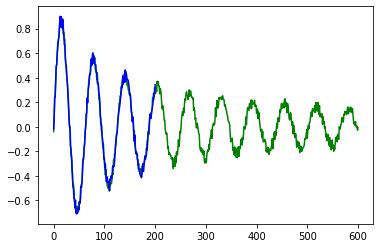

In [86]:

# sin波にノイズを付与する
def toy_problem(T=100, ampl=0.05, length=2):
    x = np.linspace(0, T*length, T*length+1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return np.sin(x/T*10)/(1+x/T) + noise

f = toy_problem()
ff = toy_problem(length=6)
#print(f)
plt.plot(range(0, len(ff)), ff, color="g", label="future_data")
plt.plot(range(0, len(f)), f, color="b", label="row_data")
plt.show()

In [87]:
def make_dataset(low_data, n_prev=100):

    data, target = [], []
    maxlen = 25

    for i in range(len(low_data)-maxlen):
        data.append(low_data[i:i + maxlen])
        target.append(low_data[i + maxlen])
    re_data = np.array(data).reshape(len(data), maxlen, 1)
    re_target = np.array(target).reshape(len(data), 1)

    return re_data, re_target


#g -> 学習データ，h -> 学習ラベル
g, h = make_dataset(f)
print(g.shape)

(176, 25, 1)


In [88]:
length_of_sequence = g.shape[1] 

in_out_neurons = 1
n_hidden = 300

model = Sequential()
model.add(LSTM(n_hidden, batch_input_shape=(None, length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam(lr=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)

In [89]:
early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=20)
model.fit(g, h,
          batch_size=300,
          epochs=100,
          validation_split=0.1,
          callbacks=[early_stopping]
          )

Train on 158 samples, validate on 18 samples
Epoch 1/100
158/158 [==============================] - 0s 3ms/step - loss: 0.1435 - val_loss: 0.0347
Epoch 2/100
158/158 [==============================] - 0s 865us/step - loss: 0.1016 - val_loss: 0.0436
Epoch 3/100
158/158 [==============================] - 0s 846us/step - loss: 0.0759 - val_loss: 0.0523
Epoch 4/100
158/158 [==============================] - 0s 859us/step - loss: 0.0608 - val_loss: 0.0476
Epoch 5/100
158/158 [==============================] - 0s 859us/step - loss: 0.0467 - val_loss: 0.0337
Epoch 6/100
158/158 [==============================] - 0s 871us/step - loss: 0.0321 - val_loss: 0.0199
Epoch 7/100
158/158 [==============================] - 0s 815us/step - loss: 0.0204 - val_loss: 0.0101
Epoch 8/100
158/158 [==============================] - 0s 846us/step - loss: 0.0128 - val_loss: 0.0045
Epoch 9/100
158/158 [==============================] - 0s 840us/step - loss: 0.0087 - val_loss: 0.0033
Epoch 10/100
158/158 [========

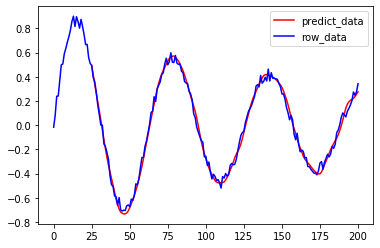

(176, 25, 1)


In [90]:
predicted = model.predict(g)
plt.figure()
plt.plot(range(25,len(predicted)+25),predicted, color="r", label="predict_data")
plt.plot(range(0, len(f)), f, color="b", label="row_data")
plt.legend()
plt.show()
print(g.shape)

(1, 25)
(1, 25)


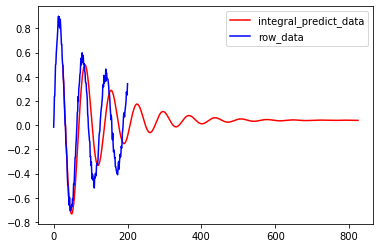

In [91]:
# 1つの学習データの時間の長さ -> 25

integ_predict_test = g[0].T
print(integ_predict_test.shape)
time_length = g.shape[1]
# 未来の予測データを保存していく変数
integ_predict_result = np.empty((0))

# 未来予想
for step2 in range(800):

    test_data = np.reshape(integ_predict_test, (1, time_length, 1))
    batch_predict = model.predict(test_data)

    integ_predict_test = np.delete(integ_predict_test, 0)
    integ_predict_test = np.append(integ_predict_test, batch_predict)

    integ_predict_result = np.append(integ_predict_result, batch_predict)
# 1つの学習データの時間の長さ -> 25

future_test = g[len(g)-1].T
print(future_test.shape)
time_length = g.shape[1]
# 未来の予測データを保存していく変数
future_result = np.empty((0))

# 未来予想
for step2 in range(400):

    test_data = np.reshape(future_test, (1, time_length, 1))
    batch_predict = model.predict(test_data)

    future_test = np.delete(future_test, 0)
    future_test = np.append(future_test, batch_predict)

    future_result = np.append(future_result, batch_predict)


# sin波をプロット
plt.figure()
#plt.plot(range(25,len(predicted)+25),predicted, color="black", label="predict_data")
plt.plot(range(25,len(integ_predict_result)+25),integ_predict_result, color="r", label="integral_predict_data")
#plt.plot(range(0, len(ff)), ff, color="orange", label="true_future_data")
plt.plot(range(0, len(f)), f, color="b", label="row_data")
#plt.plot(range(0+len(f), len(future_result)+len(f)), future_result, color="g", label="future_predict")
plt.legend()
plt.show()